# FAIRTAX ANALYTICS

# Taxpayer Risk Classification Project 

## Project Overview

At **FairTax Analytics**, we believe in fostering **fairness, transparency, and efficiency** in tax administration through the power of data science. In many countries, tax evasion and non-compliance continue to significantly erode government revenue needed for vital public services such as education, healthcare and infrastructure. While many taxpayers comply with regulations, others exploit system loopholes or intentionally evade taxes

Traditional manual audit selection methods rely heavily on human judgment and are constrained by limited resources often leading to inefficiencies and inequitable targeting. **FairTax Analytics** uses machine learning to unlock the full potential of taxpayer data  including revenue, expenses, filing patterns  and industry classification to automatically detect high-risk taxpayers. This enables **smarter enforcement**, **early risk detection** and **a more just and data-driven tax ecosystem**

## Business Problem

Tax authorities worldwide face the ongoing challenge of identifying high risk taxpayers in a **cost-effective and accurate** manner. Without intelligent risk profiling, audit and enforcement resources may be poorly allocated  resulting in **missed revenue opportunities** and **unnecessary scrutiny** of compliant individuals and businesses

**FairTax Analytics** addresses this issue by building a robust, data-driven classification model to assess taxpayer risk. Our goal is to empower authorities to focus compliance efforts where they matter most

### The key challenge:

> **How can we leverage taxpayer financial and behavioral data to automatically and accurately classify taxpayers by risk level, in order to support targeted audits, enhance compliance monitoring, and increase tax revenue efficiency?**

---

## Stakeholders
| Stakeholder             | Role / Interest                                                                                 |
|------------------------|------------------------------------------------------------------------------------------------|
| **Tax Authority / Revenue Service**| Responsible for tax collection, compliance enforcement, and overall revenue maximization.    |
| **Audit Teams**            | Use risk classifications to prioritize audits and investigations for efficient resource use.   |
| **Policy Makers**           | Use insights from the model to improve tax regulations and compliance strategies.               |
| **Taxpayers**               | Subject to audits and compliance monitoring; directly impacted by classification outcomes.     |
| **Data Analysts / Data Scientists** | Develop, validate, and maintain predictive models, providing actionable insights to stakeholders |

---

## Business Objectives
1. **How can we improve audit efficiency by prioritizing audits on high-risk taxpayers to reduce costs and increase revenue recovery?**

2. **How can we develop a predictive model to categorize taxpayers by risk level (Low, High) for ongoing compliance monitoring and early intervention?**

3. **How can we proactively identify potential non-compliant taxpayers to reduce tax evasion and maximize government revenue?**

---

## Analysis Objectives
- **How can we build and validate a machine learning classification model that accurately predicts the risk label of taxpayers based on their financial and behavioral features?**

- **Which features  most significantly influence the taxpayer risk classification and how can these insights inform targeted policy actions?**

---
## Data Understanding

We will use taxpayer financial and behavioral data to build a predictive model. The dataset includes records of individual and business taxpayers, featuring approximately **1000** observations and **13** columns

## Data Source
[Tax Risk Identification Dataset (Kaggle)](https://www.kaggle.com/datasets/ziya07/tax-risk-identification-dataset)

## Data Description

| Column Name              | Description                                                                                   | Data Type              |
|--------------------------|-----------------------------------------------------------------------------------------------|------------------------|
| `Taxpayer_ID`            | Unique identifier for each taxpayer                                                           | Categorical (ID)       |
| `Revenue`                | Total revenue reported by the taxpayer                                                        | Numeric (Continuous)   |
| `Expenses`               | Total expenses declared by the taxpayer                                                       | Numeric (Continuous)   |
| `Tax_Liability`          | Total tax amount the taxpayer is liable to pay                                                | Numeric (Continuous)   |
| `Tax_Paid`               | Actual tax amount paid by the taxpayer                                                        | Numeric (Continuous)   |
| `Late_Filings`           | Number of late tax return submissions                                                         | Numeric (Discrete)     |
| `Compliance_Violations` | Count of compliance violations reported                                                        | Numeric (Discrete)     |
| `Industry`               | Industry sector in which the taxpayer operates                                                | Categorical            |
| `Profit`                 | Net profit calculated as Revenue minus Expenses                                               | Numeric (Continuous)   |
| `Tax_Compliance_Ratio`   | Ratio of tax paid to tax liability                                                            | Numeric (Continuous)   |
| `Audit_Findings`         | Number of issues found during audits                                                          | Numeric (Discrete)     |
| `Audit_to_Tax_Ratio`     | Ratio of audit findings to tax liability or tax paid                                          | Numeric (Continuous)   |
| `Risk_Label`             | Target variable: classification of the taxpayer’s compliance risk (e.g., Low, Medium, High)   | Categorical (Target)   |



### Data Overview

Key features in the dataset include:

- **Demographics** – Taxpayer ID, age, industry, location
- **Financial Data** – Reported revenue, deductible expenses, net income
- **Behavioral Data** – Filing frequency, past audits, late submissions, and penalties
- **Risk Labels** – Historical classification as high, medium, or low risk (target variable)

### Data Exploration Approach

To extract actionable insights and ensure data quality, we will:

- Load and inspect the dataset to understand its structure and feature types
- Handle missing values through imputation or removal depending on the nature and distribution
- Explore relationships between taxpayer behavior and risk level
- Visualize trends, outliers, and class imbalance (if any) before modeling


## Prediction Target

We aim to predict the **Risk_Label** a binary target variable that indicates whether a taxpayer is at **high risk (1)** or **low risk (0)** of non-compliance or tax evasion. This label is derived from the taxpayer's financial and compliance behavior data
For this analysis we have excluded the **Medium risk** category to focus on a **binary classification problem** enabling more effective prioritization of high-risk taxpayers for audits and enforcement actions




# Import modules & packages

In [1]:
# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,auc,classification_report 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree

# Warnings
import warnings
warnings.filterwarnings('ignore')



# Load Dataset

In [2]:
data = pd.read_csv(r"C:\Users\Harriet\Downloads\PHASE 3 PROJECT\data\tax_risk_dataset.csv")
data.head()

,Taxpayer_ID,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Compliance_Violations,Industry,Profit,Tax_Compliance_Ratio,Audit_Findings,Audit_to_Tax_Ratio,Risk_Label
0,1,1149014.25,979871.09,39872.33,28921.92,2,1,Finance,169143.16,0.73,0,0.0,High
1,2,958520.71,884926.74,47832.22,39396.15,1,1,Retail,73593.97,0.82,0,0.0,Medium
2,3,1194306.56,711926.07,38113.70,43863.94,4,0,Manufacturing,482380.49,1.15,3,0.0,High
3,4,1456908.96,570612.64,45380.58,66876.88,4,2,Finance,886296.32,1.47,1,0.0,High
4,5,929753.99,839644.66,21595.78,53565.53,0,0,Tech,90109.33,2.48,2,0.0,Low


# EXPLORATORY DATA ANALYSIS

## Data Exploration

We will perform an initial exploration of the dataset to understand its structure and quality by:

- Previewing the first few rows to get a glimpse of the data  
- Examining the dataset’s dimensions and column names to identify the available features  
- Checking the data types and metadata to assess completeness and memory usage  
- Generating a statistical summary to understand the distribution and characteristics of numerical variables  
- Checking for missing values to identify any potential data quality issues that need to be addressed  


In [3]:
# DATA EXPLORATION
print("==========================DATA OVERVIEW============================")
print("\nPreview of the first five rows:")
print(data.head())

print(f"\nDataset shape: {data.shape}")
print(f"\nDataset columns: {list(data.columns)}")

print("==========================DATA TYPES===========================")
print("\nData types:")
print(data.dtypes)

print("==========================META DATA===========================")
print("\nMeta data:")
data.info()  

print("==========================STATISTICAL SUMMARY===========================")
print("\nStatistical summary:")
print(data.describe().round(2))



==========================DATA OVERVIEW============================

Preview of the first five rows:
   Taxpayer_ID     Revenue   Expenses  Tax_Liability  Tax_Paid  Late_Filings  \
0            1  1149014.25  979871.09       39872.33  28921.92             2   
1            2   958520.71  884926.74       47832.22  39396.15             1   
2            3  1194306.56  711926.07       38113.70  43863.94             4   
3            4  1456908.96  570612.64       45380.58  66876.88             4   
4            5   929753.99  839644.66       21595.78  53565.53             0   

   Compliance_Violations       Industry     Profit  Tax_Compliance_Ratio  \
0                      1        Finance  169143.16                  0.73   
1                      1         Retail   73593.97                  0.82   
2                      0  Manufacturing  482380.49                  1.15   
3                      2        Finance  886296.32                  1.47   
4                      0           Tec

## DATA PREPARATION

### Checking for missing, duplicated and placeholder values.

We will begin the data cleaning by checking for missing, duplicated and placeholder values in the dataset. One function will be used to check for them.

In [4]:
# Creating a function that returns null, duplicated and placeholder values in the dataset.

def data_prep(df):
    print('-------------------------Missing Values Check---------------------------------------\n')
    print(f'Number of null values in each column in the dataset:\n{df.isnull().sum()}\n')
    print('-------------------------Duplicated Values Check------------------------------------\n')
    print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}\n')
    print('-------------------------Placeholder Values Check-----------------------------------\n')
    for column in df.columns:
        unique_values = df[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
        placeholder_count = len(placeholders)
    
        print(f"Column: '{column}'")
        print(f"Placeholders found: {placeholders}")
        print(f"Count of placeholders: {placeholder_count}\n")
# Checking in our dataset.
data_prep(data)

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
Taxpayer_ID              0
Revenue                  0
Expenses                 0
Tax_Liability            0
Tax_Paid                 0
Late_Filings             0
Compliance_Violations    0
Industry                 0
Profit                   0
Tax_Compliance_Ratio     0
Audit_Findings           0
Audit_to_Tax_Ratio       0
Risk_Label               0
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'Taxpayer_ID'
Placeholders found: []
Count of placeholders: 0

Column: 'Revenue'
Placeholders found: []
Count of placeholders: 0

Column: 'Expenses'
Placeholders found: []
Count of placeholders: 0

Column: 'Tax_Liability'
Placeholders found: []
Count of placeholders: 0

The dataset has no missing,duplicated or placeholder values

Let's check if the dataset has any outliers and decide on whether to drop or keep them

In [5]:
# Creating a function that checks for outliers in the dataset.
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr

        # Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data.select_dtypes(include = ['number'])
check_outliers(data, columns_to_check)

Taxpayer_ID
Number of outliers: 0

Revenue
Number of outliers: 8

Expenses
Number of outliers: 8

Tax_Liability
Number of outliers: 10

Tax_Paid
Number of outliers: 5

Late_Filings
Number of outliers: 0

Compliance_Violations
Number of outliers: 0

Profit
Number of outliers: 5

Tax_Compliance_Ratio
Number of outliers: 51

Audit_Findings
Number of outliers: 0

Audit_to_Tax_Ratio
Number of outliers: 0



The dataset has a few outliers so let's try to visualize them

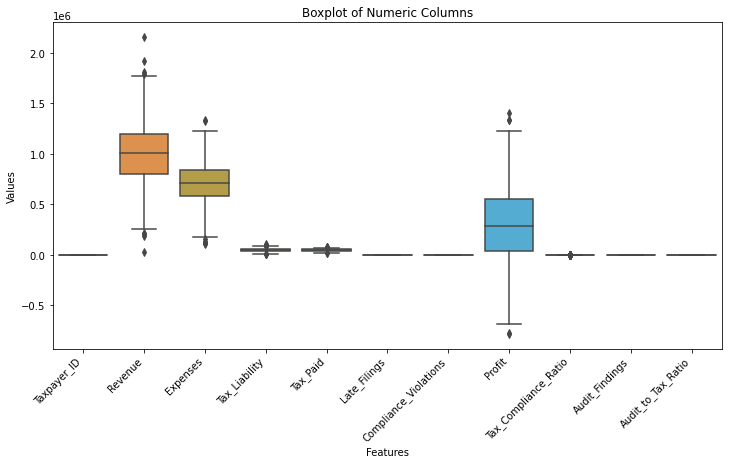

In [6]:
# Plotting a boxplot to check for outliers
features_to_plot = data.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

- Let's drop all the outliers

In [7]:
def remove_outliers(data, columns):
    for column in columns:
        iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
        lower_threshold = data[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = data[column].quantile(0.75) + 1.5 * iqr
        data = data[(data[column] >= lower_threshold) & (data[column] <= upper_threshold)]
    return data

columns_to_check = data.select_dtypes(include=['number']).columns
data = remove_outliers(data, columns_to_check)


- Let's visualize after dropping otliers

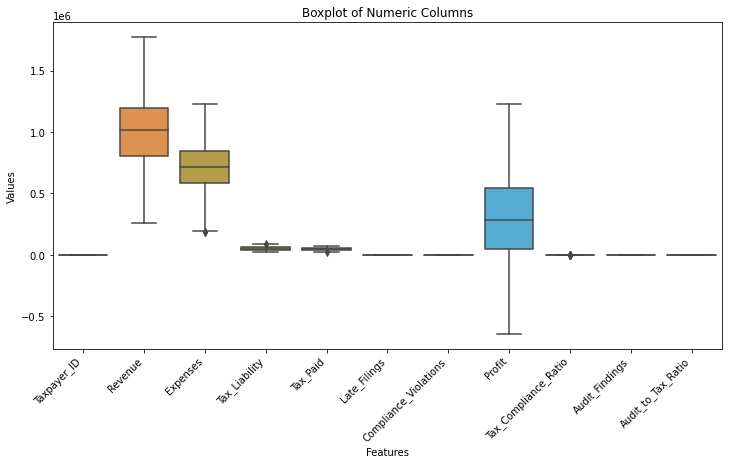

In [8]:
# Plotting a boxplot to check for outliers
features_to_plot = data.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

- The dataset is ready for preprocessing

# Data Preprocessing

In [9]:
data.columns

Index(['Taxpayer_ID', 'Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid',
       'Late_Filings', 'Compliance_Violations', 'Industry', 'Profit',
       'Tax_Compliance_Ratio', 'Audit_Findings', 'Audit_to_Tax_Ratio',
       'Risk_Label'],
      dtype='object')

### Handling the Target Variable (`Risk_Label`)

- For binary classification let's filter the dataset to keep only the rows where the `Risk_Label` is either **"Low"** or **"High"**
- This ensures that only relevant classes are included in the analysis
  
- Let's manually map the categorical labels to numeric values:
  - `"Low"` is mapped to `0`
  - `"High"` is mapped to `1`


In [10]:
data = data[data["Risk_Label"].isin(["Low", "High"])]
data["Risk_Label"] = data["Risk_Label"].map({"Low": 0, "High": 1})


Let's now do a value count of the Risk Label column to see if the rows have 0 and 1

In [11]:
data["Risk_Label"].value_counts()

1    685
0    128
Name: Risk_Label, dtype: int64

# Analyzing the target variable 
- Let's visualize the frequency of each category in the Risk_Label feature to understand the distribution of risk classes in the dataset

1    685
0    128
Name: Risk_Label, dtype: int64


Text(0, 0.5, 'Count')

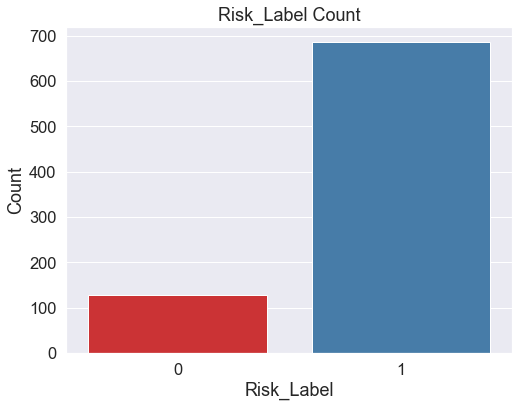

In [12]:
# Display value counts of unique items
print(data['Risk_Label'].value_counts())

# Set custom font parameters
sns.set(font_scale=1.5)
colors = sns.color_palette("Set1")
# Create a countplot of the 'Risk label' feature
plt.figure(figsize=(8, 6))  
sns.countplot(x='Risk_Label', data=data, palette=colors)
plt.title("Risk_Label Count")
plt.xlabel("Risk_Label")
plt.ylabel("Count")

- The plot shows that label 1 occurs more frequently than label 0, indicating class imbalance

## Class imbalance

In [13]:
# Class frequency of target variable 
print(data['Risk_Label'].value_counts())
print()
print(data['Risk_Label'].value_counts(normalize = True))

1    685
0    128
Name: Risk_Label, dtype: int64

1    0.842558
0    0.157442
Name: Risk_Label, dtype: float64


- Let's use a pie chart to visualize the classes 

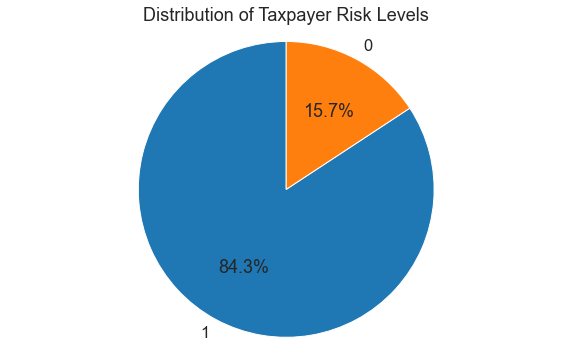

In [14]:
# Create a pie chart to visualize the Risk label
risk_counts = data['Risk_Label'].value_counts()
import seaborn as sns
colors = sns.color_palette('tab10', n_colors=len(risk_counts))
plt.figure(figsize=(10, 6))
plt.pie(risk_counts, 
        labels=risk_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors= colors)
plt.title('Distribution of Taxpayer Risk Levels')
plt.axis('equal')
plt.show()

- The target variable, Risk_Label, is imbalanced with 84.3% high risk (1) and 15.7% low risk (0) taxpayers
- This imbalance can cause models to favor the majority class, so we will use SMOTE technique  and appropriate evaluation metrics to correct the imbalance

## Feature Distributions by Risk Label

Let's use KDE plots to compare the distribution of each numerical feature across `Risk_Label = 0` (nonrisky) and `Risk_Label = 1` (risky) taxpayers. These visualizations will help us identify which features can distinguish between risky and non-risky behavior



In [15]:
print(data["Audit_to_Tax_Ratio"].nunique())
print(data["Audit_to_Tax_Ratio"].describe())

1
count    813.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Audit_to_Tax_Ratio, dtype: float64


- We will not plot the audit to tax ratio feature because all values are 0.0  so the plot will be a flat line or empty and will not show any separation between risky and non risky taxpayers

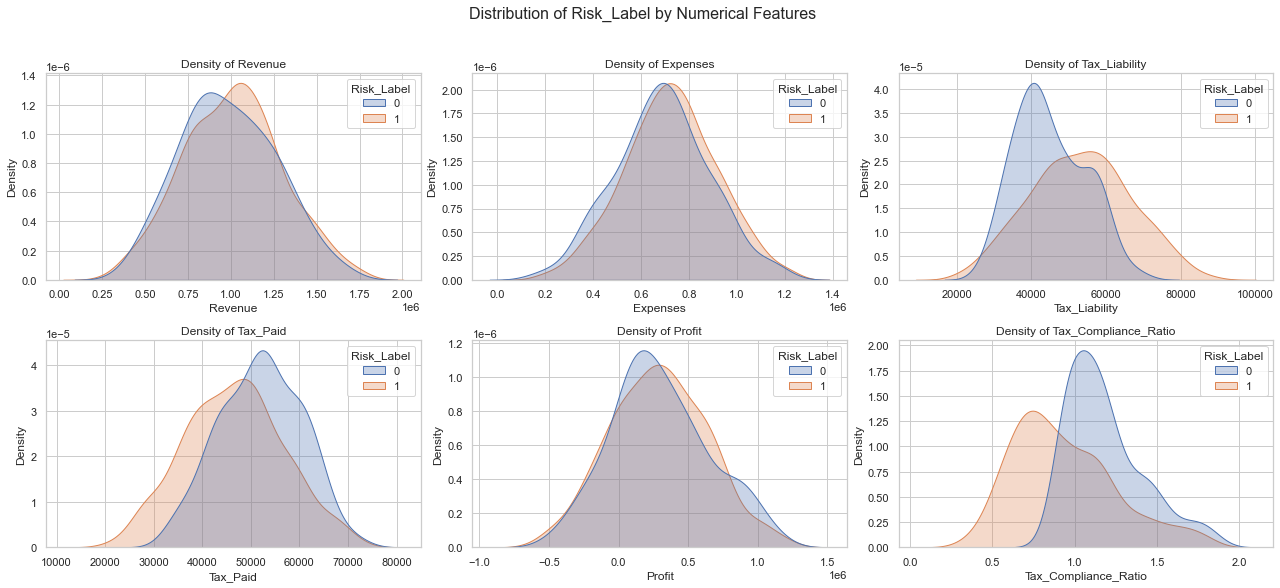

In [16]:
# List of relevant numerical features to plot
numerical_features = [
    'Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Profit',
    'Tax_Compliance_Ratio']

# Set up plot style
sns.set(style="whitegrid")

# Create subplots
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

# Plot KDEs
for idx, feature in enumerate(numerical_features):
    sns.kdeplot(
        data=data, x=feature, hue='Risk_Label',
        common_norm=False, fill=True, alpha=0.3,
        ax=axes[idx]
    )
    axes[idx].set_title(f'Density of {feature}', fontsize=12)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Density')

# Hide any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

# Overall title
plt.suptitle("Distribution of Risk_Label by Numerical Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


### Key Features that Show Separation Between Risk Labels

**1. Tax_Compliance_Ratio**
- **Observation:** Risky taxpayers (`Risk_Label = 1`) show a broader, flatter distribution with a notable density around **0.6 to 1.0**. Non-risky taxpayers (`Risk_Label = 0`) exhibit a sharp peak around **1.0 to 1.5**
- **Interpretation:** Risky individuals tend to have **lower tax compliance ratios**, indicating they **pay less relative to their liabilities**. Non-risky taxpayers typically meet or exceed compliance expectations

**2. Tax_Paid**
- **Observation:** Risky taxpayers peak in the **40k–50k** range, while non-risky ones show a broader and slightly higher peak around **50k–65k**
- **Interpretation:** High-risk taxpayers tend to **pay less in taxes**, possibly due to evasion or underreporting. Non-risky individuals tend to pay more, aligning with proper filing behavior

**3. Tax_Liability**
- **Observation:** Risky taxpayers peak at **higher liability values** (around **60k–70k**) while non-risky ones peak around **40k–50k**
- **Interpretation:** Risky individuals **owe more in taxes** potentially due to higher income or **less frequent or inaccurate tax payments**. This reinforces risk when combined with low tax paid


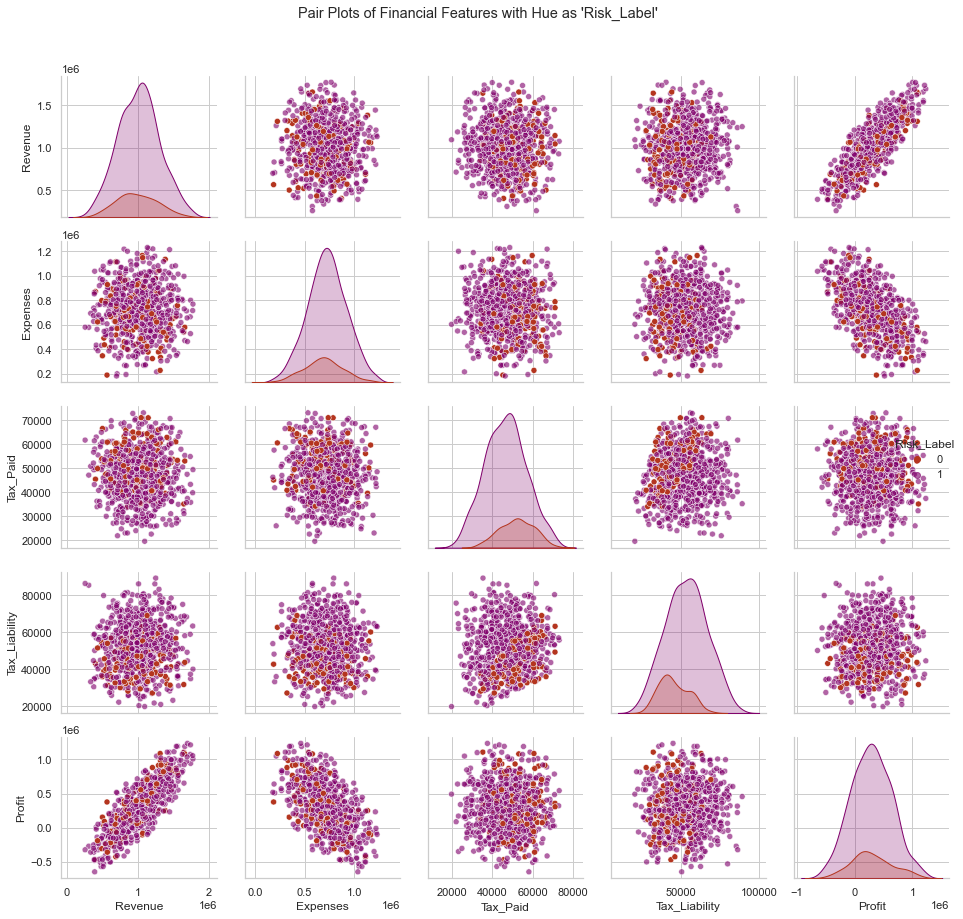

In [17]:
# Select relevant numerical features and include the target variable
selected_features = data[["Revenue", "Expenses", "Tax_Paid", "Tax_Liability", "Profit", "Risk_Label"]]


# Define a custom color palette for better class distinction
custom_palette = {0: "#b4351f", 1: "#80006B9B"}

# Create pair plots with 'Risk_Label' as hue
sns.pairplot(selected_features, hue="Risk_Label", height=2.5,palette=custom_palette,)
plt.suptitle("Pair Plots of Financial Features with Hue as 'Risk_Label'", y=1.02)
plt.tight_layout()
plt.show()

# Identify numerical and categorical columns

In [18]:
numerical_cols = ['Taxpayer_ID', 'Revenue', 'Expenses', 'Tax_Liability', 
                  'Tax_Paid', 'Late_Filings', 'Compliance_Violations', 'Profit',
                    'Tax_Compliance_Ratio', 'Audit_Findings']
categorical_cols = ['Industry','Risk_Label']


### Visualizing  the distribution the categorical feature

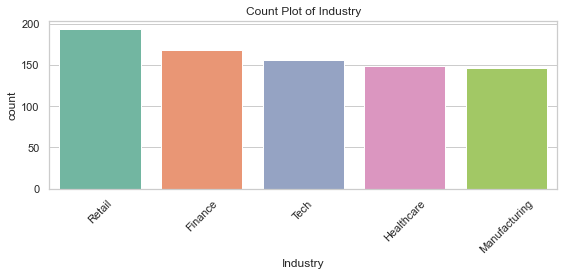

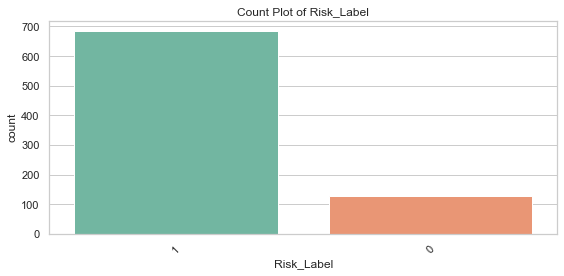

In [19]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index, palette='Set2')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Retain industry and class 1 are the most frequent ones

# Correlation matrix for all the Numeric columns 

- Let's visualize how numerical features are correlated and  identify strong relationships 

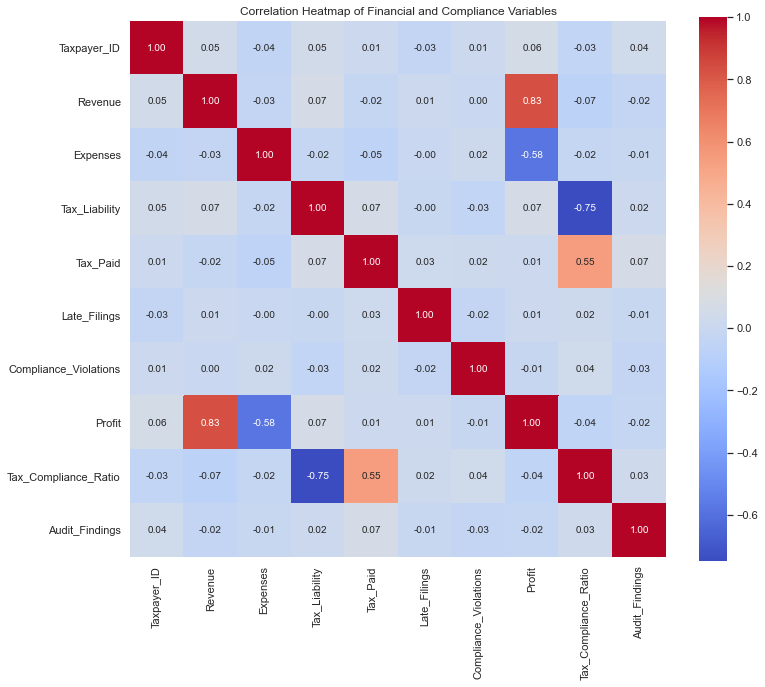

In [20]:
# Define numeric features from your dataset
numeric_features = numerical_cols

# Calculate correlation matrix
correlation_matrix = data[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm",
            square=True,
            fmt=".2f",
            annot_kws={"size": 10})
plt.title("Correlation Heatmap of Financial and Compliance Variables")
plt.show()


### Correlation Insights

- There is a **strong positive correlation** between **Revenue** and **Profit** indicating that as revenue increases, profit tends to increase as well
- **Tax_Paid** shows a **moderate positive correlation** with the **Tax_Compliance_Ratio** suggesting that taxpayers who pay more tend to be more compliant
- There is a **strong negative correlation** between **Tax_Compliance_Ratio** and **Tax_Liability** implying that higher liabilities are associated with lower compliance ratios
- **Profit** also shows a **moderate negative correlation** with **Expenses**, indicating that increased expenses are associated with lower profits
- Variables like **Taxpayer_ID** and **Audit_Findings** show **little to no meaningful correlation** with other variables, suggesting limited value in predictive modeling


# PREDICTIVE MODELLING

## Define the features

### Feature Removal Justification

The following features were excluded to prevent data leakage:  
- `Compliance_Violations`  
- `Audit_Findings`  
- `Audit_to_Tax_Ratio`  
- `Tax_Compliance_Ratio`  

**Reason**: These represent outcomes determined *after* risk assessment  like audit results creating unrealistic "hindsight" knowledge that inflates performance artificially. Their removal ensures the model uses only genuine predictive factors like  revenue, late filings ...that align with real world audit 

- We also  dropped Taxpayer_ID because it is a unique identifier for each individual and does not provide any predictive value for determining risk level. Including it in the model could lead to overfitting or noise, as it simply identifies a record rather than describing any meaningful behavior or financial attribute

In [21]:
# First, define X and y by separating features from target
X = data.drop(columns=['Taxpayer_ID', 'Risk_Label'])  # Features
y = data['Risk_Label']  # Target variable

# Features that cause data leakage (remove these)
leakage_features = [
    'Audit_Findings',           # Results known only after audit occurs
    'Compliance_Violations',    # Directly indicates risk (circular logic)
    'Audit_to_Tax_Ratio',       # Derived from audit results
    'Tax_Compliance_Ratio'      # Essentially encodes the risk level
]

# Create clean feature set by removing leakage features

X = X.drop(columns=leakage_features)



# Train Test Split

In [22]:
## Create training and test sets
SEED = 42
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state = SEED)

In [23]:
X_train.shape ,X_test.shape

((569, 7), (244, 7))

## Encode categorical data as numbers

Since all of our data  has some  categorical columns , we need to encode them as numbers using sklearn's `preprocessing` module  `OneHotEncoder`

In [24]:
# Define features explicitly based on your columns 
numeric_features = ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings','Profit']

categorical_features = ['Industry']  


# One-hot encode categorical features in X_train
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = ohe.fit_transform(X_train[categorical_features])
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical_features), index=X_train.index)

# Scale numeric features in X_train
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numeric_features])
num_df = pd.DataFrame(X_train_num_scaled, columns=numeric_features, index=X_train.index)

# Combine numeric and categorical features for X_train
X_train_processed = pd.concat([num_df, ohe_df], axis=1)

# Show resulting DataFrame after preprocessing
X_train_processed.head()


,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Profit,Industry_Healthcare,Industry_Manufacturing,Industry_Retail,Industry_Tech
833,-0.894613,0.236538,-0.444435,-1.372225,0.581670,-0.853252,0.0,1.0,0.0,0.0
163,-0.952283,-1.782499,1.187291,-0.656610,-0.780348,0.232037,0.0,0.0,0.0,0.0
460,2.085150,-0.208094,-0.040642,1.691837,1.262679,1.796356,0.0,0.0,0.0,0.0
323,2.224363,0.444841,1.803850,0.279278,-0.099339,1.542506,1.0,0.0,0.0,0.0
535,-0.005657,-1.729534,-0.468778,1.592330,1.262679,0.964911,0.0,0.0,1.0,0.0


### Applying SMOTE after preprocessing to balance training data

In [25]:
# Apply SMOTE after preprocessing to balance training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)



Let's check the class distribution before and after applying SMOTE to see if the data is balanced after 

In [26]:
# check class distribution before and after
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({1: 481, 0: 88})
After SMOTE: Counter({1: 481, 0: 481})


- Before SMOTE  the dataset was imbalanced with more samples in class 1 than class 0 but after applying SMOTE, synthetic samples were added to the minority class (0) to balance both classes equally improving the dataset for better model training.So after SMOTE both classes have 481 samples (balanced)

###  Preprocess X_test using fitted transformers

In [27]:
# Preprocess X_test using fitted transformers
X_test_ohe = ohe.transform(X_test[categorical_features])

# Create DataFrame with proper column names for X_test
ohe_test_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical_features), index=X_test.index)

# Scale numeric features in X_test using the fitted scaler
X_test_num_scaled = scaler.transform(X_test[numeric_features])

# Convert scaled numeric features back to DataFrame
num_test_df = pd.DataFrame(X_test_num_scaled, columns=numeric_features, index=X_test.index)

# Combine scaled numeric features and one-hot encoded categorical features for X_test
X_test_processed = pd.concat([num_test_df, ohe_test_df], axis=1)
# Show resulting DataFrame after preprocessing X_test
X_test_processed.head()


,Revenue,Expenses,Tax_Liability,Tax_Paid,Late_Filings,Profit,Industry_Healthcare,Industry_Manufacturing,Industry_Retail,Industry_Tech
301,-0.668211,0.973013,-1.279909,-0.895673,-1.461357,-1.083694,0.0,0.0,0.0,0.0
725,-0.257975,1.071159,-0.124020,0.598350,0.581670,-0.808238,0.0,0.0,0.0,1.0
277,-0.711869,0.347486,-1.453835,0.157764,1.262679,-0.768231,0.0,0.0,0.0,0.0
352,0.877917,0.502263,0.660461,0.446634,-0.780348,0.425677,0.0,0.0,0.0,0.0
662,-0.093061,-2.280285,0.560835,0.392629,0.581670,1.203218,0.0,0.0,0.0,0.0


- After preprocessing our dataset is ready for modelling

# MODELLING

### Modeling Approach

We will begin by building a **Logistic Regression** model as our baseline for evaluating classification performance. This simple and interpretable model will provide a benchmark for comparison

Next, we will implement a series of **Decision Tree** models to improve performance:

- **Untuned Decision Tree**: A basic model built using only `random_state=42` without any hyperparameter optimization
- **Manually Pruned Decision Tree**: A tree where we manually searched for optimal hyperparameters such as `max_depth`, `min_samples_split`, `min_samples_leaf` and `max_features` to reduce overfitting and improve generalization
- **GridSearchCV Pruned Decision Tree**: A model tuned using `GridSearchCV` to automate the search for the best combination of hyperparameters
- **Tuned Random Forest** : A model also  tuned using `GridSearchCV` to automate the search for the best combination of hyperparameters
We will evaluate all models using **Accuracy** and **ROC AUC** to assess their overall performance and ability to distinguish between classes


## MODEL 1:LOGISTIC MODEL(Baseline model)


Let's fit a **Logistic Regression** model on the SMOTE balanced training data 

In [28]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

Logistic Regression Accuracy: 0.8524590163934426


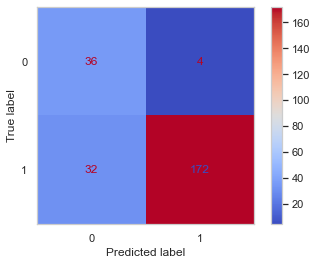

In [29]:
# Make predictions for the test data using your preprocessed X_test
y_pred = logreg.predict(X_test_processed)

# Calculate accuracy
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix with labels from your classifier classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)

# Plot with customizations
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.coolwarm, ax=ax)
ax.grid(False) 
plt.show()

172 True Positives: The model correctly predicted 172 high-risk taxpayers 
- directly supports audit prioritization and revenue recovery goals

32 False Negatives: The model missed 32  High-risk taxpayers 
- potential lost revenue and an area for model improvement

4 False Positives: 4 Low-risk taxpayers wrongly flagged as high-risk tax payers 
- may cause some unnecessary audits but impact is minor

36 True Negatives: The model correctly predicted 36 low-risk taxpayers 
- improves audit efficiency by avoiding unnecessary reviews

In [30]:
print("Logistic Regression Classification Report\n\n", classification_report(y_test, y_pred))

Logistic Regression Classification Report

               precision    recall  f1-score   support

           0       0.53      0.90      0.67        40
           1       0.98      0.84      0.91       204

    accuracy                           0.85       244
   macro avg       0.75      0.87      0.79       244
weighted avg       0.90      0.85      0.87       244



### Interpretation of Logistic Regression Results

The Logistic Regression model achieved an overall accuracy of **85%** indicating strong performance in classifying taxpayers into risk categories

**Class 1 (High Risk):**
The model performs exceptionally well on this class, with a precision of **0.98** and recall of **0.84**. This means it very accurately identifies high-risk taxpayers and rarely misses them
- This supports our business objective of prioritizing audits on high-risk individuals to improve audit efficiency and maximize revenue recovery

**Class 0 (Low Risk):**
Precision is **0.53** and recall is **0.90**, meaning the model correctly identifies most low-risk taxpayers, although there's a slightly higher chance of false positives (low-risk taxpayers incorrectly flagged)
- While this is acceptable, improving precision for this class would help reduce unnecessary audits of compliant taxpayers

**F1-scores:**

**Class 0: 0.67**

**Class 1: 0.91**

These reinforce that the model is particularly strong at identifying high-risk taxpayers  aligning well with our goal of early non-compliance detection and risk-based audit prioritization

 - These results indicate that Logistic Regression is a strong starting point for building a taxpayer risk classification system enabling early intervention and focused compliance efforts
- Further tuning or trying more complex models may improve performance on the low-risk class and help fine tune risk thresholds


## Compute ROC & AUC 

In [31]:
#roc and auc

fpr,tpr,thresholds = roc_curve(y_test,y_pred)
log_roc_auc = auc(fpr,tpr)
print("Logistic roc_auc:",log_roc_auc)

Logistic roc_auc: 0.8715686274509804


### ROC and AUC Interpretation for Logistic Regression

The **ROC AUC score** for the Logistic Regression model is approximately  **0.87**. This means that the model has a strong ability to distinguish between high-risk and low-risk taxpayers 
- This performance suggests the model is effective in supporting the **business objective** of identifying high-risk taxpayers for audit prioritization and early intervention
- The  result confirms that Logistic Regression is a reliable baseline model for predicting taxpayer risk

To further improve performance, we will explore more  models and apply techniques like hyperparameter tuning and pruning


## Plot ROC CURVE

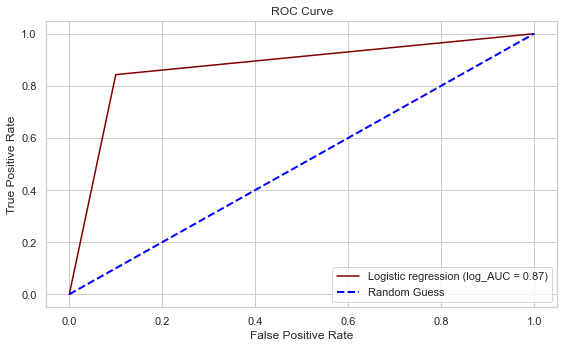

In [32]:
plt.figure(figsize=(8,5))
lw =2
plt.plot(fpr, tpr, label=f'Logistic regression (log_AUC = {log_roc_auc:.2f})',color ="maroon")
plt.plot([0, 1], [0, 1],lw =lw,ls ='--',color ="Blue",label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

- The Logistic regression Roc curve  stays farthest from the diagonal and closest to the top left corner indicating the highest True positive rate for the lowest false positive rate

## MODEL 2:UNTUNED DECISION TREE MODEL

### Data Preprocessing Approach

We will use **unscaled data** as Decision Trees and Random Forests are not affected by feature scaling. We will **not apply SMOTE** since these models are generally robust to class imbalance. Instead, we will evaluate their performance using recall and precision metrics to ensure effective identification of high risk taxpayers. We will  also apply **One-Hot Encoding** to convert categorical variables into a numeric format suitable for tree based algorithms. This preprocessing approach leverages the natural strengths of these models while keeping the workflow minimal and efficient.



In [33]:
# First, define X and y by separating features from target
X = data.drop(columns=['Taxpayer_ID', 'Risk_Label'])  # Features
y = data['Risk_Label']  # Target variable

# Features that cause data leakage (remove these)
leakage_features = [
    'Audit_Findings',           # Results known only after audit occurs
    'Compliance_Violations',    # Directly indicates risk (circular logic)
    'Audit_to_Tax_Ratio',       # Derived from audit results
    'Tax_Compliance_Ratio'      # Essentially encodes the risk level
]

# Create clean feature set by removing leakage features

X = X.drop(columns=leakage_features)


In [34]:
## Create training and test sets
SEED = 42
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state = SEED)

In [35]:
# Define features explicitly based on your columns 
numeric_features = ['Revenue', 'Expenses', 'Tax_Liability', 'Tax_Paid', 'Late_Filings','Profit']

categorical_features = ['Industry']   


# One-hot encode categorical features in X_train
ohe = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = ohe.fit_transform(X_train[categorical_features])
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical_features), index=X_train.index)



X_train_final = pd.concat([X_train[numeric_features], ohe_df], axis=1)


X_test_ohe = ohe.transform(X_test[categorical_features])
ohe_test_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical_features), index=X_test.index)
X_test_final = pd.concat([X_test[numeric_features], ohe_test_df], axis=1)


## Train the classifier and make predictions

In [36]:
# Create the classifier, fit it on the training data and make predictions on the test set

Untuned_clf = DecisionTreeClassifier(random_state = SEED)
Untuned_clf.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=42)

Untuned_tree_Accuracy: 0.8975409836065574


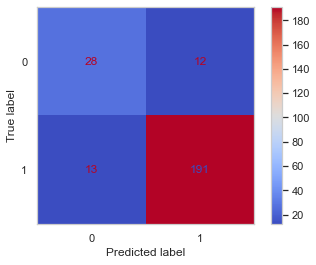

In [37]:
# predictions
y_pred_1=Untuned_clf.predict(X_test_final)

# Calculate accuracy
print('Untuned_tree_Accuracy:', accuracy_score(y_test, y_pred_1))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_1)

# Display confusion matrix with labels from your classifier classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

# Plot with customizations
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.coolwarm, ax=ax)
ax.grid(False) 
plt.show()

| Metric               | Value | Interpretation                                                                                                            |
| -------------------- | ----- | ------------------------------------------------------------------------------------------------------------------------- |
| True Positives (TP)  | 191   | The model correctly identified **191 high risk taxpayers** :excellent recall for high risk class                       |
| True Negatives (TN)  | 28   | Correctly identified **28 low-risk taxpayers** :good performance though slightly fewer than high risk                  |
| False Positives (FP) | 12    | Only **12 low-risk taxpayers were incorrectly flagged** as high risk : very low false alarm rate minimizing unnecessary audits |
| False Negatives (FN) | 13    | **13 high-risk taxpayer  were missed** :This should be checked for audit prioritization to avoid revenue loss                                 |


In [38]:
print("Untuned Decision tree Classification Report\n\n", classification_report(y_test, y_pred_1))


Untuned Decision tree Classification Report

               precision    recall  f1-score   support

           0       0.68      0.70      0.69        40
           1       0.94      0.94      0.94       204

    accuracy                           0.90       244
   macro avg       0.81      0.82      0.81       244
weighted avg       0.90      0.90      0.90       244




### Model Performance 

**Key Metrics**  
| Metric          | Low-Risk (Class 0) | High-Risk (Class 1) |  
|-----------------|-------------------|--------------------|  
| **Precision**   | 68%               | 94%                |  
| **Recall**      | 70%               | 94%                |  
| **F1-Score**    | 0.69              | 0.94               |  

**Business Implications**  
**High-Risk Focus**:  
- **94% recall/precision** for high-risk taxpayers ensures **efficient audit targeting**, minimizing revenue leakage(only 6% evasion missed)  
- **6% false positives** reduce wasted audit resources

 **Low-Risk Tradeoffs**:  
- **30% of compliant taxpayers** misclassified as high-risk (fairness concern) 
- **68% precision** suggests **32% of predicted "low-risk" may actually need scrutiny** 

**Overall Accuracy**: **90%** – Reliable for large-scale risk prioritization  

**Actions for FairTax Analytics**:  
1. **Optimize fairness**: Secondary checks for low-risk misclassifications to reduce taxpayer burden  
2. **Leverage high-risk precision**: Confidently allocate audit resources where revenue impact is highest 
3. **Monitor false negatives**: Address the 6% undetected high risk cases through iterative model refinement


In [39]:
#roc and auc

fpr,tpr,thresholds = roc_curve(y_test,y_pred_1)
tree1_roc_auc = auc(fpr,tpr)
print("Untuned Tree roc auc:",tree1_roc_auc)

Untuned Tree roc auc: 0.8181372549019608


## Plot ROC CURVE

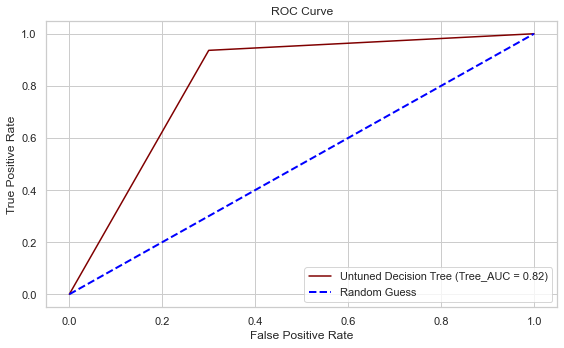

In [40]:
plt.figure(figsize=(8,5))
lw =2
plt.plot(fpr, tpr, label=f'Untuned Decision Tree (Tree_AUC = {tree1_roc_auc:.2f})',color ="maroon")
plt.plot([0, 1], [0, 1],lw =lw,ls ='--',color ="Blue",label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

- **ROC AUC close to 0.82** demonstrates excellent ability of the model to distinguish between high and low risk taxpayers
  
 - **Improvement Potential**: Fine tuning like hyperparameter optimization could improve the model and enhance generalizability


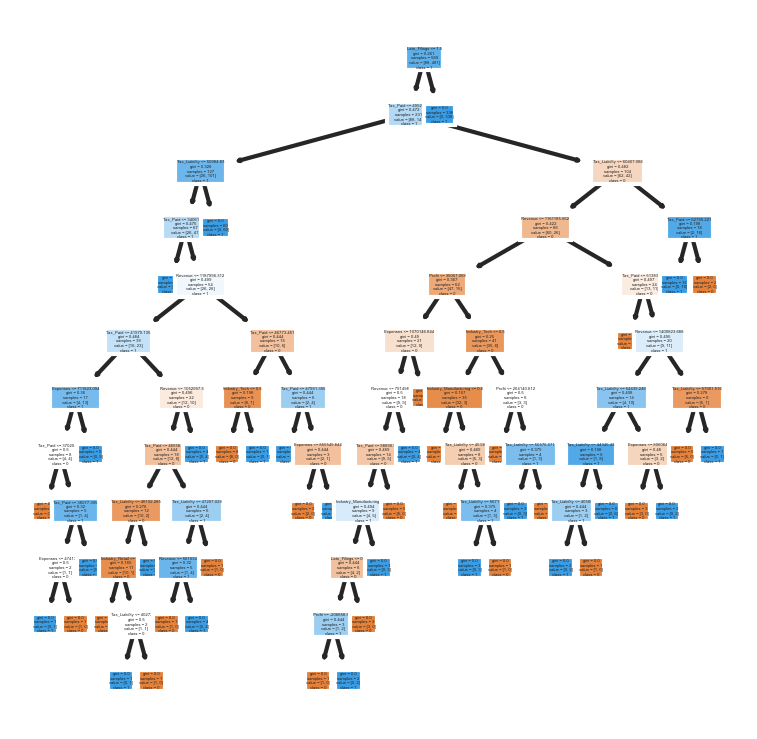

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(Untuned_clf,
               feature_names = X_train_final.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

- The default criterion is gini as seen in the above diagram

## MODEL 3:TUNED DECISION TREE MODEL

## Hyperparameter Tuning and Pruning in Decision Trees


- Since Decision trees are prone to overfitting ,effective pruning can reduce this likelihood

### ⟦ 1 ⟧ Manual evaluation of the optimal Hyperparameters

## 1.MAX DEPTH

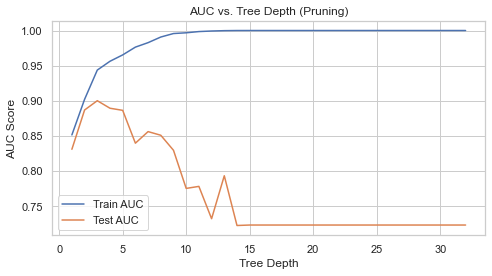

In [42]:
depths =range(1,33)
train_auc=[]
test_auc = []

for d in depths:
    clf = DecisionTreeClassifier(max_depth = d, criterion='entropy', random_state = SEED)
    clf.fit(X_train_final, y_train)

    y_train_pred = clf.predict_proba(X_train_final)[:,1]
    y_test_pred = clf.predict_proba(X_test_final)[:,1]

    train_auc.append(auc(*roc_curve(y_train, y_train_pred)[:2]))# use the fpr and tpr and not the threshold
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

plt.figure(figsize=(7, 4))
plt.plot(depths, train_auc, label="Train AUC")
plt.plot(depths, test_auc, label="Test AUC")
plt.xlabel("Tree Depth")
plt.ylabel("AUC Score")
plt.title("AUC vs. Tree Depth (Pruning)")
plt.legend()
plt.tight_layout()
plt.show()

Maximum depth = 4

## 2. Minimum sample split

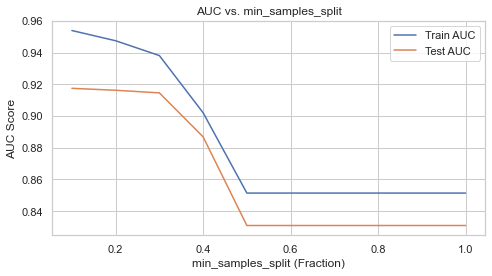

In [43]:
#minimum_splits : minimum number of samples needed to split an internal node. lets test values from 0.1 to 1.0.
maximum_splits = np.arange(0.1, 1.1, 0.1)
train_auc = []
test_auc = []

for s in maximum_splits:
    clf = DecisionTreeClassifier(min_samples_split=s, criterion='entropy', random_state=SEED)
    clf.fit(X_train_final, y_train)

    y_train_pred = clf.predict_proba(X_train_final)[:, 1]
    y_test_pred = clf.predict_proba(X_test_final)[:, 1]
    
    train_auc.append(auc(*roc_curve(y_train, y_train_pred)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

# Plot
plt.figure(figsize=(7, 4))
plt.plot(maximum_splits, train_auc, label="Train AUC")
plt.plot(maximum_splits, test_auc, label="Test AUC")
plt.xlabel("min_samples_split (Fraction)")
plt.ylabel("AUC Score")
plt.title("AUC vs. min_samples_split")
plt.legend()
plt.tight_layout()
plt.show()

Minimum sample split = 0.3

# 3. Minimum sample leaf

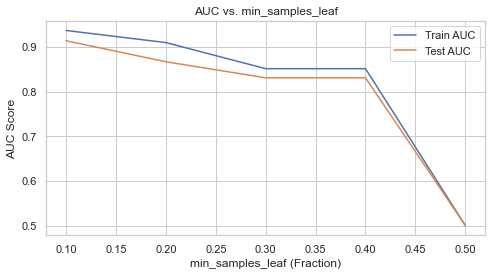

In [44]:
#min_samples_leaf :Controls the minimum number of samples required to be at a leaf node

leafs = np.arange(0.1, 0.6, 0.1)
train_auc = []
test_auc = []

for l in leafs:
    clf = DecisionTreeClassifier(min_samples_leaf=l, criterion='entropy', random_state=SEED)
    clf.fit(X_train_final, y_train)

    y_train_pred = clf.predict_proba(X_train_final)[:, 1]
    y_test_pred = clf.predict_proba(X_test_final)[:, 1]
    
    train_auc.append(auc(*roc_curve(y_train, y_train_pred)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

plt.figure(figsize=(7, 4))
plt.plot(leafs, train_auc, label="Train AUC")
plt.plot(leafs, test_auc, label="Test AUC")
plt.xlabel("min_samples_leaf (Fraction)")
plt.ylabel("AUC Score")
plt.title("AUC vs. min_samples_leaf")
plt.legend()
plt.tight_layout()
plt.show()

Minimum sample leaf = 0.3

# 4.Maximum features

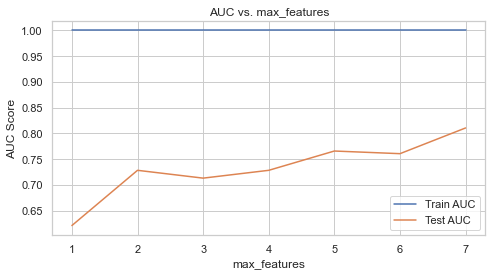

In [45]:
max_features = range(1, X.shape[1] + 1)
train_auc = []
test_auc = []

for f in max_features:
    clf = DecisionTreeClassifier(max_features=f, criterion='entropy', random_state=SEED)
    clf.fit(X_train_final, y_train)

    y_train_pred = clf.predict_proba(X_train_final)[:, 1]
    y_test_pred = clf.predict_proba(X_test_final)[:, 1]
    
    train_auc.append(auc(*roc_curve(y_train, y_train_pred)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

# Plot
plt.figure(figsize=(7, 4))
plt.plot(max_features, train_auc, label="Train AUC")
plt.plot(max_features, test_auc, label="Test AUC")
plt.xlabel("max_features")
plt.ylabel("AUC Score")
plt.title("AUC vs. max_features")
plt.legend()
plt.tight_layout()
plt.show()

Maximum features = 5

# Final pruned Decision Tree

Manually pruned roc_auc: 0.8308823529411764


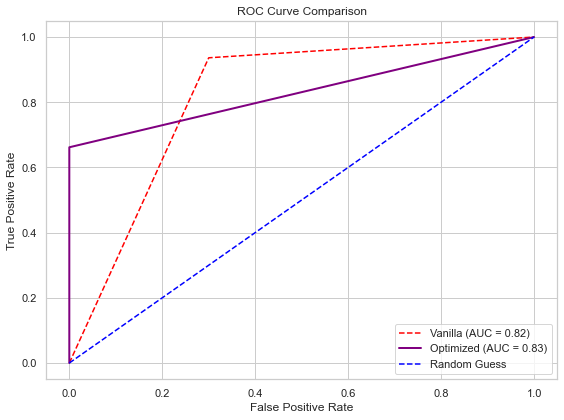

In [46]:
dt_pruning1 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth= 4,
    min_samples_split=0.3,
    min_samples_leaf=0.3,
    max_features= 5,
    
    random_state=SEED)

dt_pruning1.fit(X_train_final, y_train)

y_pred_pruned = dt_pruning1.predict_proba(X_test_final)[:, 1]
fpr_opt, tpr_opt,thresholds = roc_curve(y_test, y_pred_pruned)
roc_auc_pruned = auc(fpr_opt, tpr_opt)

print("Manually pruned roc_auc:",roc_auc_pruned)


# Plotting 
plt.figure(figsize=(8, 6))
lw =2
plt.plot(fpr, tpr, label=f'Vanilla (AUC = {tree1_roc_auc:.2f})', linestyle='--',color ="red")
plt.plot(fpr_opt, tpr_opt, label=f'Optimized (AUC = {roc_auc_pruned:.2f})', lw =lw,color ="purple")
plt.plot([0, 1], [0, 1], 'k--',color ="blue",label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()


- **Vanilla classifier AUC:** 0.82  
- **Optimized classifier AUC (manual tuning):** 0.83  

### Interpretation:
- The optimized classifier performed almost the same as the vanilla classifier likely because tuning hyperparameters one at a time can lead to suboptimal results
- To address this and find the best combination of hyperparameters, we will use the **Grid Search** technique which systematically evaluates multiple parameters together for optimal performance


### ⟦ 2 ⟧ Use GridSearchCV

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

SEED = 42

Untuned_clf = DecisionTreeClassifier(random_state=SEED)

param_grid = {
    'criterion': ["entropy", "gini"],
    'max_depth': range(1, 10),   
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None,'sqrt', 'log2']  }

grid_search = GridSearchCV(
    estimator=Untuned_clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs=1  
)

grid_search.fit(X_train_final, y_train)

print("Best parameters found:", grid_search.best_params_)

best_clf = grid_search.best_estimator_


Best parameters found: {'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Final Pruned roc_auc: 0.900061274509804


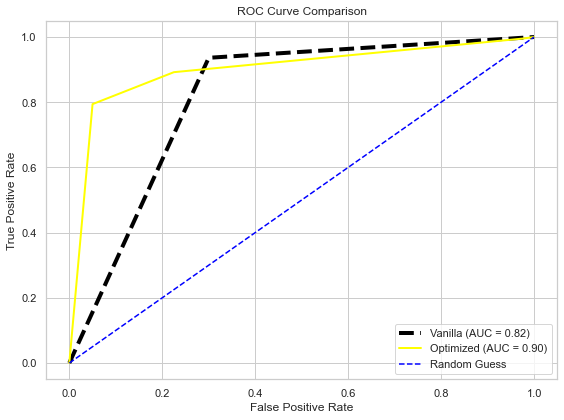

In [48]:
dt_pruning2 = DecisionTreeClassifier(
    criterion='entropy',
    max_depth= 3,                  
    min_samples_split= 2,          
    min_samples_leaf=1,            
    max_features= None,           
    random_state=SEED
)

dt_pruning2.fit(X_train_final, y_train)

# Predict probabilities for ROC curve (positive class probabilities)
y_pred_pruned = dt_pruning2.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr_opt, tpr_opt, thresholds = roc_curve(y_test, y_pred_pruned)
roc_auc_pruned = auc(fpr_opt, tpr_opt)
print("Final Pruned roc_auc:",roc_auc_pruned)

# Plotting 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Vanilla (AUC = {tree1_roc_auc:.2f})', linestyle='--',lw=4,color ="black")
plt.plot(fpr_opt, tpr_opt, label=f'Optimized (AUC = {roc_auc_pruned:.2f})', lw =lw,color ="yellow")
plt.plot([0, 1], [0, 1], 'k--',color ="blue",label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()


- **Vanilla classifier AUC:** 0.82
- **Optimized classifier AUC (Grid Search tuning):** 0.90 

### Interpretation:
- The Grid Search tuning improved the  performance of the vanilla classifier achieving  a higher AUC of 0.90

 **Significant Improvement**  
   - Hyperparameter tuning **boosted AUC by 8 percentage points** 0.82  to 0.90
   - This represents a **10% relative improvement** in risk discrimination capability  
**Tuning Impact**  
   - Grid Search uncovered better parameter combinations that improved generalization to unseen taxpayer data

# Plot Decision Tree

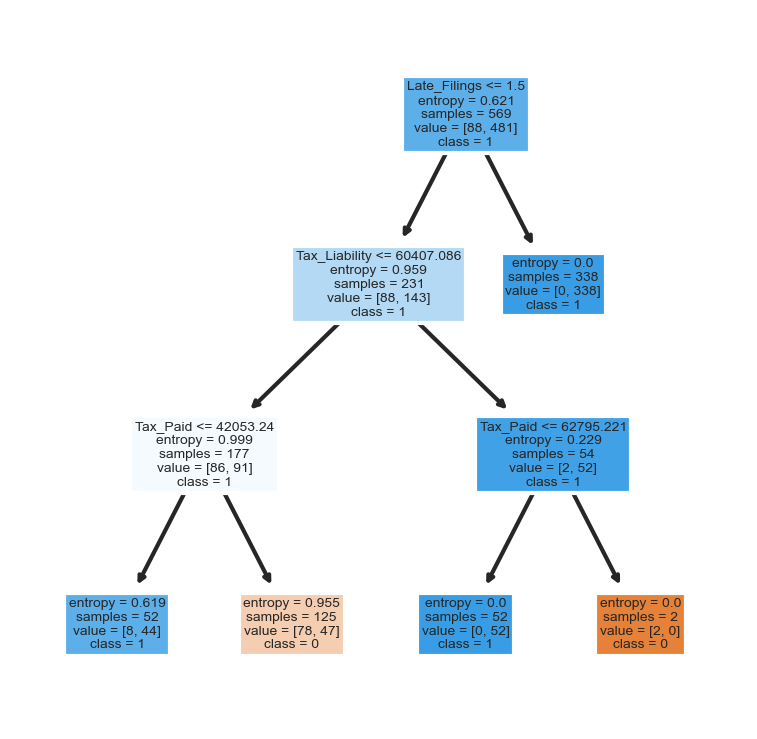

In [49]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(dt_pruning2,
               feature_names = X_train_final.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score

y_train_proba = dt_pruning2.predict_proba(X_train_final)[:, 1]
y_test_proba = dt_pruning2.predict_proba(X_test_final)[:, 1]

print("Train AUC:", roc_auc_score(y_train, y_train_proba))
print("Test AUC:", roc_auc_score(y_test, y_test_proba))


Train AUC: 0.9436543186543187
Test AUC: 0.900061274509804


- **Train AUC = 0.94:**  
  The model perfectly separates the classes on the training data indicating an excellent fit

- **Test AUC = 0.90:**  
  The model maintains strong discriminatory power on unseen test data effectively distinguishing high risk from low risk taxpayers with minimal performance loss


In [51]:
from sklearn.metrics import confusion_matrix, classification_report

y_test_pred = dt_pruning2.predict(X_test_final)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


[[ 31   9]
 [ 22 182]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.67        40
           1       0.95      0.89      0.92       204

    accuracy                           0.87       244
   macro avg       0.77      0.83      0.79       244
weighted avg       0.89      0.87      0.88       244



- **Confusion Matrix Summary:**
  - True Negatives : 31 low-risk taxpayers correctly identified
  - False Positives : 9 low-risk taxpayer incorrectly flagged as high risk
  - False Negatives : 22  high-risk taxpayers missed 
  - True Positives : 182 high-risk taxpayers correctly identified

- **Classification Metrics:**
**High-Risk Detection (Class 1)**

- 89% Recall: Captures nearly 9/10 actual high-risk taxpayers (misses 11% of evaders)

- 95% Precision: When predicted high-risk, 95% are truly non-compliant (only 5% false alarms)

- Strong F1 (92%): Excellent balance for enforcement prioritization

**Low-Risk Identification (Class 0)**

- 78% Recall: Correctly identifies 78% of compliant taxpayers (22% incorrectly flagged as high-risk)

- 58% Precision: When predicted low-risk, only 58% are truly compliant (42% may be risky)

- Moderate F1 (67%): Indicates room for improvement in fairness



Overall Accuracy (87%): Strong for initial deployment

- **Business Implications:**
  - The model effectively prioritizes high risk taxpayers for audits without missing any supporting revenue maximization and efficient audits
  - Very low false positive rate reduces unnecessary audits on compliant taxpayers
  - Strong AUC and classification results demonstrate the model’s robustness for taxpayer risk classification


## MODEL 4: TUNED RANDOM FOREST CLASSIFIER

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report

rf = RandomForestClassifier(
        n_estimators=500,
        class_weight='balanced',
        random_state=SEED,
        n_jobs=-1
)

param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 0.5, None]
}

grid = GridSearchCV(
        rf,
        param_grid,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,
        verbose=1
)

grid.fit(X_train_final, y_train)

print("Best ROC AUC (CV):", grid.best_score_)
best_rf = grid.best_estimator_

y_test_proba = best_rf.predict_proba(X_test_final)[:, 1]
print("Test ROC AUC:", roc_auc_score(y_test, y_test_proba))
print(classification_report(y_test, best_rf.predict(X_test_final)))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best ROC AUC (CV): 0.9459595321519215
Test ROC AUC: 0.948529411764706
              precision    recall  f1-score   support

           0       0.67      0.78      0.72        40
           1       0.95      0.93      0.94       204

    accuracy                           0.90       244
   macro avg       0.81      0.85      0.83       244
weighted avg       0.91      0.90      0.90       244



### Tuned Random Forest Performance 

**Optimization Process:**
- **Best Cross-Validated ROC AUC:** 0.946 :Shows excellent consistency across folds
- **Test Set ROC AUC:** 0.949 : Nearly identical to CV score  indicating no overfitting

**Classification Performance:**
| Metric       | Low-Risk (0) | High-Risk (1) | Overall       |
|--------------|--------------|---------------|---------------|
| **Precision**| 67%          | 95%           |               |
| **Recall**   | 78%          | 93%           |               |
| **F1-Score** | 72%          | 94%           |               |
| **Support**  | 40           | 204           | Accuracy: 90% |

**Interpretation:**
1 **High-Risk Detection :Excellent:**
   - 93% recall : Captures nearly all true high risk taxpayers only 7% missed
   - 95% precision : When predicted high risk, 95% are truly non compliant
   - F1-score of 0.94 : Near perfect balance for enforcement decisions

 **Low-Risk Identification (Improved):**
   - 78% recall : Better identification of compliant taxpayers 
   - 67% precision :Still some false negatives 33% of "low-risk" predictions may be risky

 **Business Impact:**
   - **9% overall error rate** : Strong for operational deployment
   - **7% high-risk misses** : Potential revenue leakage worth investigating
   - **22% low-risk false alarms** :May unnecessarily burden compliant taxpayers






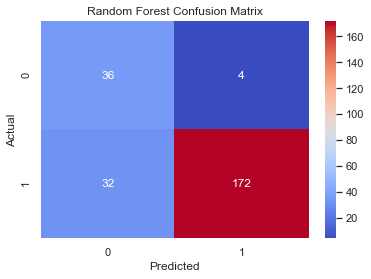

In [53]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


### Confusion Matrix Interpretation

- **True Negatives TN = 36** - Correctly classified low-risk taxpayers
- **False Positives FP = 4** - 4 low risk taxpayer were wrongly flagged as high risk
- **False Negatives FN = 32** -  32 high risk taxpayer were missed
- **True Positives TP = 172** -  172 high-risk taxpayers were correctly identified

The false negative numbers are quite alarming



## Visualizing Decision Trees from the Random Forest

To better understand the ensemble model, we visualize individual trees from the Random Forest. Below , we display the **First** and **Second** decision trees showing how they make classification decisions based on the features

- Visualizing the **First Decision Tree** provides insight into one component of the ensemble
- Visualizing the **Second Decision Tree** helps compare variations among trees within the forest



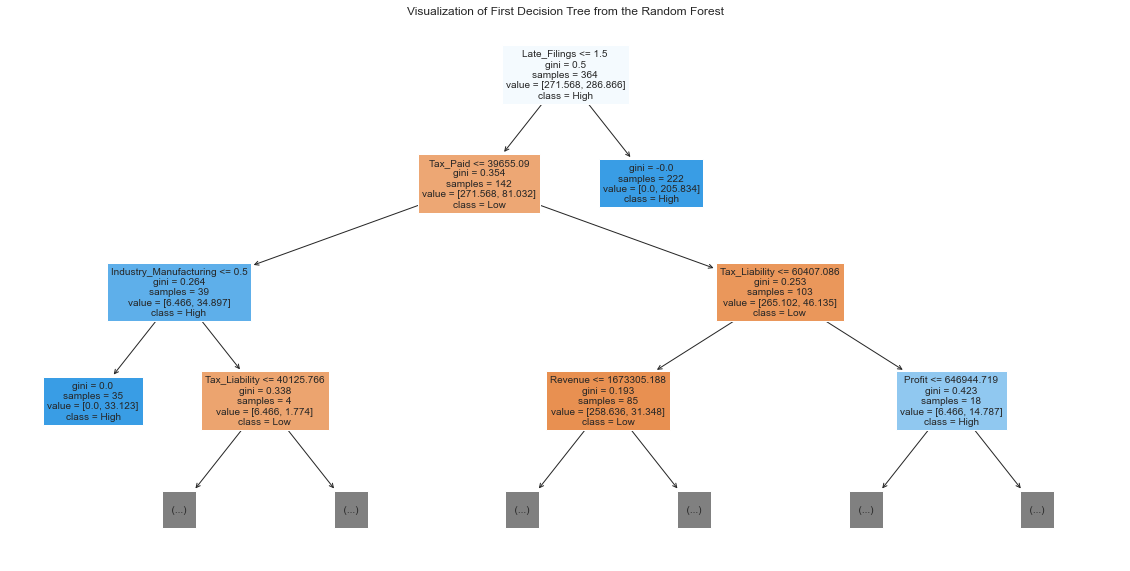

In [54]:
from sklearn.tree import plot_tree

if hasattr(best_rf, "estimators_"):
    plt.figure(figsize=(20, 10))
    plot_tree(best_rf.estimators_[0],  # First tree in the forest
              filled=True,
              feature_names=X_train_final.columns,
              class_names=["Low", "High"],
              max_depth=3,  #  limit depth for readability
              fontsize=10)
    plt.title("Visualization of First Decision Tree from the Random Forest")
    plt.show()
else:
    print("The trained model does not expose individual decision trees.")




- Let's visualize the  second tree

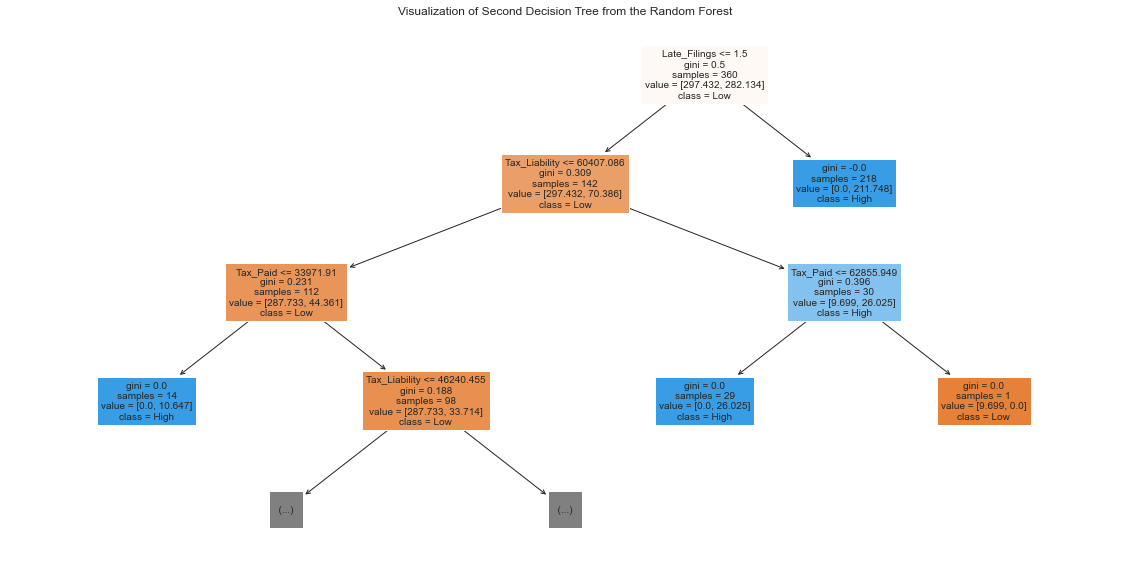

In [55]:
# Check if the model exposes individual trees
if hasattr(best_rf, "estimators_"):
    plt.figure(figsize=(20, 10))
    plot_tree(
        best_rf.estimators_[1],  # Second tree 
        filled=True,
        feature_names=X_train_final.columns,
        class_names=["Low", "High"],
        max_depth=3,  # Limit tree depth for readability
        fontsize=10
    )
    plt.title("Visualization of Second Decision Tree from the Random Forest")
    plt.show()
else:
    print("The trained model does not expose individual decision trees.")



- The trees are quite many so we just visualized the first and second tree 

# MODEL  PERFORMANCE EVALUATION 


## Model Comparison 

After evaluating all the models on the test set, here are the results:

| Model                            | Accuracy | Precision (Low / High) | Recall (Low / High) | F1-Score (Low / High) | ROC AUC | Key Insight                                                                                            |
| -------------------------------- | -------- | ---------------------- | ------------------- | --------------------- | ------- | ------------------------------------------------------------------------------------------------------ |
| **Logistic Regression**          | 0.85     | 0.53 / 0.98            | 0.90 / 0.84         | 0.67 / 0.91           | 0.87    | Solid baseline model; highly precise for high risk but prone to false positives in the low-risk class |
| **Untuned Decision Tree**        | 0.90     | 0.68 / 0.94            | 0.70 / 0.94         | 0.69 / 0.94           | 0.82    | Strong accuracy but less robust; may be overfitting due to lack of tuning                             |
| **Tuned Decision Tree (GridCV)** | 0.87     | 0.58 / 0.95            | 0.78 / 0.89         | 0.67 / 0.92           | 0.90    | More balanced after tuning; better generalization with improved ROC AUC                               |
| **Tuned Random Forest**          | 0.90     | 0.67 / 0.95            | 0.78 / 0.93         | 0.72 / 0.94           | 0.94    | Best overall model; excellent discrimination, precision, and recall across both classes               |

---

## Evaluation Metric Choice

For this taxpayer risk classification task, I chose **ROC AUC** as the primary evaluation metric because:

- It measures the model’s ability to distinguish between high risk and low risk taxpayers across all classification thresholds
- It balances sensitivity (recall) and specificity, which is critical when prioritizing audits to catch as many high-risk taxpayers as possible while minimizing false positives
- It provides a threshold-independent measure of performance, making it robust for business decisions

---
| Model                      | ROC AUC  |
| -------------------------- | -------- |
| Logistic Regression        | 0.87     |
| Untuned Decision Tree      | 0.82     |
| GridCV-Tuned Decision Tree | 0.90     |
| Tuned Random Forest        | **0.94** |




Based on ROC AUC, the Tuned Random Forest is the best model.

- The Tuned Random Forest (ROC AUC = 0.94) best separates the “High” from the “Low” class across all possible thresholds making it our top pick for reliable, discriminative power. Its high AUC also aligns with its strong precision and recall balances, so it will both rank and classify most effectively

- It also aligns best with Our business objective of accurately identifying high-risk taxpayers for audit prioritization, maximizing revenue recovery and minimizing false positives

---


### Final Model Selection: Tuned Random Forest

The **Tuned Random Forest** demonstrates the strongest overall performance among all models evaluated:

- Achieves the **highest ROC AUC of 0.94** indicating excellent class separation  
- Maintains a **high recall for the High risk class (0.93)**  effectively identifying most risky taxpayers  
- Balances performance with a **strong F1-score (0.94) for High-risk**  showing both precision and recall are high  
- **Minimizes false negatives**  reducing the chances of missing high risk taxpayers, while keeping false positives manageable  

This model **aligns well with the business objective**:

> Identify as many high-risk taxpayers as possible for audit, maximize revenue recovery and minimize the misclassification of compliant taxpayers

**Recommended for deployment** due to its robustness, balanced performance and strong alignment with operational goals

## Conclusion
The **Tuned Random Forest** model demonstrates the strongest overall classification performance  with a **ROC AUC of 0.94**, **high recall (0.93)** for high risk taxpayers and **strong F1-scores**:striking a balance between precision and recall. It effectively minimizes false negatives while maintaining low false positives, making it well suited for identifying high risk taxpayers

Deploying this model, especially when integrated with **interactive decision support tools**  will enable **efficient data driven audit prioritization**. To ensure long term effectiveness, the model should be supported by **continuous data updates and regular performance monitoring**

Further exploration of advanced **ensemble methods** may enhance robustness and adaptability to evolving risk patterns

Adopting the **Tuned Random Forest** model offers a significant opportunity to **improve audit effectiveness**, **maximize revenue recovery** and **reduce unnecessary scrutiny of compliant taxpayers**


## Business Recommendations
- **Deploy the Tuned Random Forest Model into Production**  
  Prioritize deploying the Tuned Random Forest model as the core engine for audit risk classification. With a **high ROC AUC of 0.94**, strong recall for high risk cases  and minimal false positives, it offers accurate identification of high risk taxpayers maximizing revenue recovery while minimizing unnecessary audits of compliant taxpayers

- **Develop User-Friendly Decision Support Tools**  
  Build interactive dashboards or web applications to provide **real-time risk scoring and visualizations**. These tools will empower auditors and stakeholders to make faster data driven decisions and allow for ongoing monitoring of model performance in production

- **Continuously Update and Expand Data Sources**  
  Regularly integrate new taxpayer records, behavioral data and macroeconomic indicators to maintain the model’s predictive accuracy and ensure adaptability to emerging risk patterns

- **Implement Continuous Monitoring and Bias Audits**  
  Establish a governance framework to track model performance and fairness metrics. This ensures **equitable treatment of all taxpayer groups** and compliance with ethical and regulatory standards

- **Explore Advanced Ensemble Methods**  
  Investigate complementary approaches such as **Gradient Boosting Machines (GBMs)** or **model stacking** to further enhance robustness and capture complex non-linear patterns for more effective audit targeting

